In [1]:
import pandas as pd

In [154]:
df = pd.read_csv('final.csv', sep= ',')

In [157]:
df.columns

Index(['Collision_Type_val_Driver-autorickshaw ', 'Collision_Type_val_Drowned',
       'Collision_Type_val_Head on', 'Collision_Type_val_Hit and Run',
       'Collision_Type_val_Hit animal', 'Collision_Type_val_Hit bicyclist',
       'Collision_Type_val_Hit fixed object',
       'Collision_Type_val_Hit parked vehicle',
       'Collision_Type_val_Hit pedal cyclist',
       'Collision_Type_val_Hit pedestrian',
       ...
       'Vehicle_Sub_Type_ROAD ROLLER', 'Vehicle_Sub_Type_SCOOTER',
       'Vehicle_Sub_Type_STATION WAGON', 'Vehicle_Sub_Type_TANKER',
       'Vehicle_Sub_Type_TEMPO', 'Vehicle_Sub_Type_TRACTOR',
       'Vehicle_Sub_Type_TRAIN', 'Vehicle_Sub_Type_Unknown',
       'Vehicle_Sub_Type_VAN', 'Vehicle_Sub_Type_accussed/summons'],
      dtype='object', length=302)

In [156]:
del df['Unnamed: 0']


In [217]:
y = pd.read_csv('severity.csv', sep= ',')

In [220]:
y= y.iloc[:,1]

In [221]:
y.shape

(152784,)

In [158]:
df.shape

(152785, 302)

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
data = df
X = df  #independent columnst
#get correlations of each features in dataset
corrmat = data.corr()
#

In [190]:
alpha = corrmat

In [196]:
def get_right_col_names(alpha):
    col_names = alpha.columns
    valid_columns=[]
    index = -1
    for col_name in col_names:
        index+=1
        if ("unknown" in col_name.lower()) or ("applicable" in col_name.lower()):
            print(col_name)
        else:
            valid_columns.append(index)
    return valid_columns

In [197]:
rc = get_right_col_names(alpha)
beta = alpha.iloc[rc,rc]

Collision_Type_val_Not Applicable
Accident_Spot_val_Not Applicable
Accident_Location_val_Not Applicable
Accident_Location_val_Unknown
Junction_Control_val_Not Applicable
Road_Character_val_Not Applicable
Road_Type_val_Not Applicable
Road_Classification_val_Unknown
Seperation_val_Not Applicable
Seperation_val_Unknown
Surface_Type_val_Not Applicable
Surface_Type_val_Unknown
Surface_Condition_val_Not Applicable
Surface_Condition_val_Unknown
Road_Condition_val_Not Applicable
Road_Condition_val_Unknown
weather_val_Not Applicable
Main_Cause_val_Not Applicable
Main_Cause_val_Unknown
Hit_Run_val_Not Applicable
Hit_Run_val_Unknown
Lane_Type_val_Unknown
Road_Markings_val_Unknown
Spot_Conditions_val_Unknown
Accident_Location_id_val_Unknown
RoadJunction_val_Not Applicable
RoadJunction_val_Unknown
Accident_spotb_val_Unknown
Vehicle_Type_Unknown
Vehicle_Vanoeuvre_Not Applicable
Vehicle_Vanoeuvre_Unknown
Vehicle_Load_Unknown
Fuel_Type_Unknown
Vehicle_Sub_Type_Unknown


In [189]:
len(rc)

268

In [198]:
def filter_df(matrix, threshold, max_features):
    num_rows = matrix.shape[0]
    most_correlated_rc= set()
    for index in range(num_rows):
        #print(index)
        #print("-----")
        count = 0
        r =0
        c = 0
        for col in range(num_rows):
            if(matrix.iloc[index][col]>threshold and matrix.iloc[index][col]<0.99):
                count+=1
                r = index
                c = col
                print(matrix.iloc[index][col])
                print("$$$")
                print(index)
                print(col)
                
                most_correlated_rc.add(index)
                most_correlated_rc.add(col)
        if(len(most_correlated_rc)>=max_features):
            break
    return most_correlated_rc
    

In [200]:
imp_f = filter_df(beta,0.3,15)

0.5028439986334079
$$$
3
138
0.39255300409198746
$$$
20
181
0.47823990551613793
$$$
20
184
0.35942585944566574
$$$
21
62
0.3367625572936984
$$$
21
74
0.31721899552976585
$$$
21
91
0.3052470917910932
$$$
22
160
0.4344051879835977
$$$
26
63
0.4174597372441684
$$$
41
75


In [201]:
imp_f

{3, 20, 21, 22, 26, 41, 62, 63, 74, 75, 91, 138, 160, 181, 184}

In [202]:
a = list(imp_f)
b = beta.iloc[a,a]


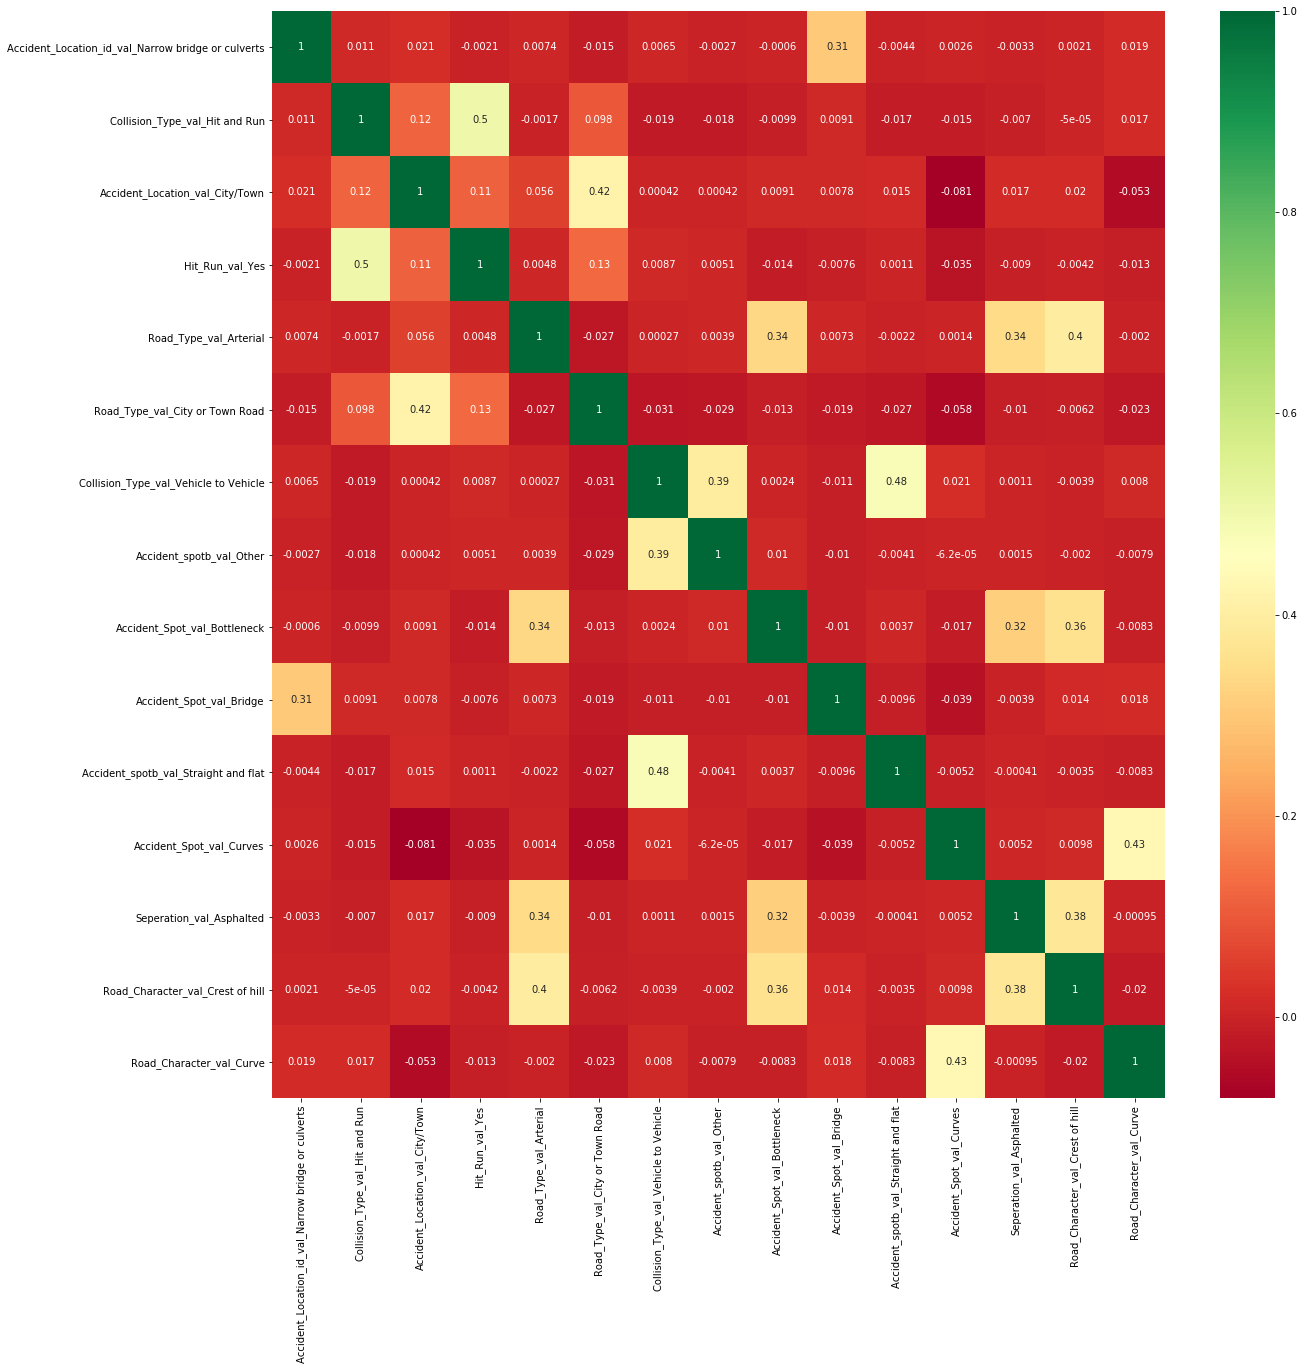

In [203]:
plt.figure(figsize=(20,20))
g=sns.heatmap(b,annot=True,cmap="RdYlGn")

In [136]:
alpha.iloc[5]

Unnamed: 0                                                 0.046710
Collision_Type_val_Brown                                  -0.000646
Collision_Type_val_Driver-autorickshaw                    -0.000646
Collision_Type_val_Drowned                                -0.034640
Collision_Type_val_Head on                                -0.097838
Collision_Type_val_Hit and Run                             1.000000
Collision_Type_val_Hit animal                             -0.019349
Collision_Type_val_Hit bicyclist                          -0.047941
Collision_Type_val_Hit fixed object                       -0.030075
Collision_Type_val_Hit parked vehicle                     -0.024212
Collision_Type_val_Hit pedal cyclist                      -0.015724
Collision_Type_val_Hit pedestrian                         -0.095169
Collision_Type_val_Hit puchcart                           -0.016107
Collision_Type_val_Medium                                 -0.000646
Collision_Type_val_Not Applicable               

In [123]:
def get_specific_rc(df, most_correlated_rc):
    new_df = pd.DataFrame()
    for index in most_correlated_rc:
        print(index)
        new_df.add(df.iloc[:index:])
        
    new_df2 = pd.DataFrame()
    for index in most_correlated_rc:
        new_df2.add(new_df.iloc[:,index])
    
    return new_df2

In [124]:
cm = get_specific_rc(alpha,imp_f)

229
5
106
107
45
46
47
50
84
23


IndexError: single positional indexer is out-of-bounds

In [44]:
def colnames():
    col_names = df.columns
    count =0
    for cn in col_names:
        count+=1
        print(count)
        print(cn)

1
Unnamed: 0
2
Collision_Type_val_Brown 
3
Collision_Type_val_Driver-autorickshaw 
4
Collision_Type_val_Drowned
5
Collision_Type_val_Head on
6
Collision_Type_val_Hit and Run
7
Collision_Type_val_Hit animal
8
Collision_Type_val_Hit bicyclist
9
Collision_Type_val_Hit fixed object
10
Collision_Type_val_Hit parked vehicle
11
Collision_Type_val_Hit pedal cyclist
12
Collision_Type_val_Hit pedestrian
13
Collision_Type_val_Hit puchcart
14
Collision_Type_val_Medium
15
Collision_Type_val_Not Applicable
16
Collision_Type_val_Others
17
Collision_Type_val_Overturning
18
Collision_Type_val_Rear end
19
Collision_Type_val_Right Turn Collision
20
Collision_Type_val_Run Off Road
21
Collision_Type_val_Side impact or Right angle
22
Collision_Type_val_Side swipe
23
Collision_Type_val_Skidding or Self accident
24
Collision_Type_val_Vehicle to Vehicle
25
Accident_Spot_val_Bottleneck
26
Accident_Spot_val_Bridge
27
Accident_Spot_val_Circle
28
Accident_Spot_val_Cross roads
29
Accident_Spot_val_Culvert
30
Accide

In [66]:
def get_index_with_df_val(df, val):
    col_names = df.columns
    for col in col_names:
        x = df.loc[df[col] == some_value]
        print(x)
        break


In [208]:
y.shape

(152784, 2)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[9.86762073e-07 2.95582718e-03 1.32163219e-02 6.28140991e-03
 1.17894524e-03 5.57600575e-03 2.48651819e-03 1.61764942e-03
 9.48922238e-04 1.13993333e-02 1.02002961e-03 1.00133064e-06
 9.45271734e-03 2.04101828e-02 3.07632536e-03 7.59752113e-03
 1.63515106e-03 1.11620478e-03 1.85348311e-03 3.37847131e-03
 5.58772976e-03 4.52197369e-04 8.39336160e-04 4.24296580e-03
 5.48758180e-03 9.77999712e-03 1.16471743e-03 6.71427696e-03
 5.62741153e-03 1.10778703e-03 1.29644092e-02 8.74831697e-03
 1.50250015e-03 1.61792308e-02 6.58847179e-05 2.78393042e-04
 2.00831388e-04 1.45658463e-03 6.05931579e-04 2.92322211e-04
 2.79524749e-03 9.65457710e-04 6.07008185e-07 7.28413345e-03
 4.40632234e-03 8.92575300e-03 2.82091481e-05 3.76958473e-03
 6.01710578e-03 1.21577989e-02 1.70122945e-03 7.19068464e-03
 1.78316562e-02 1.55668538e-02 2.53856146e-03 1.76303753e-03
 7.07627323e-04 3.13911401e-04 1.62280920e-04 3.21751924e-04
 5.57804136e-04 8.86226756e-06 1.21460243e-03 2.14238183e-07
 1.54468198e-02 4.089023

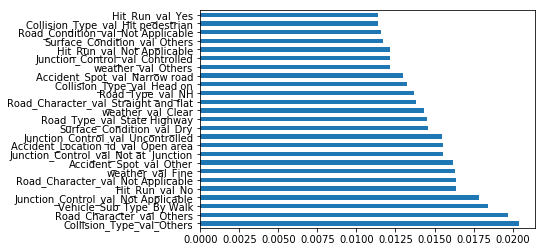

In [227]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [223]:
X= X.iloc[1:,:]

In [226]:
model.feature_importances_[0]

1.631778777046409e-06

In [229]:
feat_importances.nlargest(100)

Collision_Type_val_Others                                  0.020410
Road_Character_val_Others                                  0.019726
Vehicle_Sub_Type_By Walk                                   0.018411
Junction_Control_val_Not Applicable                        0.017832
Hit_Run_val_No                                             0.016392
Road_Character_val_Not Applicable                          0.016348
weather_val_Fine                                           0.016341
Accident_Spot_val_Other                                    0.016179
Junction_Control_val_Not at  Junction                      0.015567
Accident_Location_id_val_Open area                         0.015513
Junction_Control_val_Uncontrolled                          0.015447
Surface_Condition_val_Dry                                  0.014578
Road_Type_val_State Highway                                0.014518
weather_val_Clear                                          0.014346
Road_Character_val_Straight and flat            